In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import xgboost as xgb

from math import sqrt
from matplotlib import pyplot
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn import metrics 
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
import nltk
from nltk import word_tokenize, ngrams
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS

from numpy import interp
from sklearn.metrics import roc_curve,auc

In [ ]:
results={}

## Read data
#### x = features
#### y = effectiveness rating

In [ ]:
# posts = pd.read_excel("../Book1.xlsx")
posts = pd.read_excel('./webMD_Drugs_Nov.xlsx')
#posts.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
# already converted to 0, 1
# posts['Effectiveness'] = np.where(posts["Effectiveness"] >=3 , 1, 0).astype(int)

effectiveness = posts['Effectiveness'].astype('int').tolist()
# 
y = effectiveness
posts


,comment,Effectiveness,Duration of Treatment,Topic
0,It saved my life in 2006 but I have been on it...,1,5,3
1,the same lever all the time.I feel good !,1,1,2
2,I6t changed my life. I could not manage othe...,1,3,4
3,The experience I write about is not my own. I ...,0,4,3
4,I have been an addict for 20 years. I have tri...,1,5,3
...,...,...,...,...
4043,You have to be very careful taking this drug! ...,1,5,0
4044,"You know, nothing in life is perfect..and as a...",1,3,1
4045,Zubsolv is a miracle drug. I have been abusing...,1,0,2
4046,Zubsolv works for me,1,4,4


### Read the list of features

In [ ]:
posts.groupby('Effectiveness').count()

,comment,Duration of Treatment,Topic
Effectiveness,,,
0,746,746,746
1,3302,3302,3302


In [ ]:
with open('./featureset_200.csv', 'r') as fd:
    features = fd.read().split('\n')
len(features)

200

### Check if any item in feature list exist in a text

In [ ]:
import numpy as np
def binary_transform(text, features):
    # create a vector with all entries as 0
    output = np.zeros(len(features) )
    # for every word in vocab check if the doc contains it
    for i, v in enumerate(features[:]):
        output[i] = v.lower() in text.lower()
    #output[-1] = s
    return output.astype(int)

In [ ]:
metaMapFeatures = [binary_transform(text, features) for index, text in enumerate(posts["comment"])]
# metaMapFeatures

In [ ]:
len(metaMapFeatures[0])


200

### Remove feature with all zero values for texts

In [ ]:
metaMapFrame = pd.DataFrame(metaMapFeatures, columns=features)

df = pd.DataFrame()
df['Duration of Treatment'] = posts['Duration of Treatment']
df['Topic']= posts['Topic']
# df['comment'] = posts['comment']
# df['Effectiveness'] = posts['Effectiveness']

df_reg = pd.get_dummies(df,columns=['Duration of Treatment', 'Topic'], drop_first=True)

df_tree = pd.get_dummies(df,columns=['Duration of Treatment', 'Topic'], drop_first=False)

# df = df.loc[:, (df != 0).any(axis=0)]
# minimum_Count = 2
# df = df.loc[:, (df.sum(axis=0) >= minimum_Count)]

# df['Ease of use'] = posts['Ease of use']
#df['Satisfaction'] = posts['Satisfaction']
# df['gender'] = posts['gender']+1
# df['age group'] = posts['age group']+1
# df['duration of treatment'] = posts['duration of treatment']+1
target = posts['Effectiveness']

x = df.to_numpy().tolist()
df_reg
# target

,Duration of Treatment_1,Duration of Treatment_2,Duration of Treatment_3,Duration of Treatment_4,Duration of Treatment_5,Duration of Treatment_6,Topic_1,Topic_2,Topic_3,Topic_4
0,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4043,0,0,0,0,1,0,0,0,0,0
4044,0,0,1,0,0,0,1,0,0,0
4045,0,0,0,0,0,0,0,1,0,0
4046,0,0,0,1,0,0,0,0,0,1


In [ ]:
metaMapFrame

,abdominal pain,actiq,adderall,addictive behavior,adrenal insufficiency,advil,aids,alcoholism,ambien,anxious,...,valium,vert,vicodin,violent,vistaril,vitamin,vivitrol,vomit,vomited,zubsolv
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df

,Duration of Treatment,Topic
0,5,3
1,1,2
2,3,4
3,4,3
4,5,3
...,...,...
4043,5,0
4044,3,1
4045,0,2
4046,4,4


In [ ]:
results={}
mean_fpr = np.linspace(0,1,101)
mean_prec = np.linspace(0,1,101)


In [ ]:
# function to clean data


stops = ['the','a','an','and','but','if','or','because','as','what','which','this','that','these','those','then',
              'just','so','than','such','both','through','about','for','is','of','while','during','to','What','Which',
              'Is','If','While','This']
# punct = list(string.punctuation)
# punct.append("''")
# punct.append(":")
# punct.append("...")
# punct.append("@")
# punct.append('""')
def cleanData(text, lowercase = False, remove_stops = False, stemming = False, lemmatization = False):
    txt = str(text)
    
    # Replace apostrophes with standard lexicons
    txt = txt.replace("isn't", "is not")
    txt = txt.replace("aren't", "are not")
    txt = txt.replace("ain't", "am not")
    txt = txt.replace("won't", "will not")
    txt = txt.replace("didn't", "did not")
    txt = txt.replace("shan't", "shall not")
    txt = txt.replace("haven't", "have not")
    txt = txt.replace("hadn't", "had not")
    txt = txt.replace("hasn't", "has not")
    txt = txt.replace("don't", "do not")
    txt = txt.replace("wasn't", "was not")
    txt = txt.replace("weren't", "were not")
    txt = txt.replace("doesn't", "does not")
    txt = txt.replace("'s", " is")
    txt = txt.replace("'re", " are")
    txt = txt.replace("'m", " am")
    txt = txt.replace("'d", " would")
    txt = txt.replace("'ll", " will")
    
    # More cleaning
    txt = re.sub(r"\'s", " ", txt)
    txt = re.sub(r"\'ve", " have ", txt)
    txt = re.sub(r"can't", "cannot ", txt)
    txt = re.sub(r"n't", " not ", txt)
    txt = re.sub(r"I'm", "I am", txt)
    txt = re.sub(r" m ", " am ", txt)
    txt = re.sub(r"\'re", " are ", txt)
    txt = re.sub(r"\'d", " would ", txt)
    txt = re.sub(r"\'ll", " will ", txt)
    txt = re.sub(r" e g ", " eg ", txt)
    txt = re.sub(r"\0s", "0", txt)

    # Remove urls and emails
    txt = re.sub(r'^https?:\/\/.*[\r\n]*', ' ', txt, flags=re.MULTILINE)
    txt = re.sub(r'[\w\.-]+@[\w\.-]+', ' ', txt, flags=re.MULTILINE)
    
    # Remove punctuation from text
    txt = ''.join([c for c in text if c not in punctuation])
#     txt = txt.replace(".", " ")
#     txt = txt.replace(":", " ")
#     txt = txt.replace("!", " ")
#     txt = txt.replace("&", " ")
#     txt = txt.replace("#", " ")
    
    # Remove all symbols
    txt = re.sub(r'[^A-Za-z0-9\s]',r' ',txt)
    txt = re.sub(r'\n',r' ',txt)
    
    txt = re.sub(r'[0-9]',r' ',txt)
    
    # Replace words like sooooooo with so
    txt = ''.join(''.join(s)[:2] for _, s in itertools.groupby(txt))
    
    # Split attached words
    #txt = " ".join(re.findall('[A-Z][^A-Z]*', txt))   
    
    if lowercase:
        txt = " ".join([w.lower() for w in txt.split()])
        
    if remove_stops:
        txt = " ".join([w for w in txt.split() if w not in stops])
    if stemming:
        st = PorterStemmer()
#         print (len(txt.split()))
#         print (txt)
        txt = " ".join([st.stem(w) for w in txt.split()])
    
    if lemmatization:
        wordnet_lemmatizer = WordNetLemmatizer()
        txt = " ".join([wordnet_lemmatizer.lemmatize(w, pos='v') for w in txt.split()])

    return txt

In [ ]:
# clean description

df_comment = posts['comment'].map(lambda x: cleanData(x, lowercase=True, remove_stops=True, stemming=True, lemmatization = True))
df_comment

0       it save my life in i have be on it sinc it als...
1                          same lever all timei feel good
2       i t chang my life i could not manag other opia...
3       experi i write not my own i wa observ someon u...
4       i have be addict year i have tri rehab sever t...
                              ...                        
4043    you have be veri care take drug i know day wit...
4044    you know noth in life perfectand addict we sho...
4045    zubsolv miracl drug i have be abus opioid at l...
4046                                      zubsolv work me
4047               zubsolv work great i m much better now
Name: comment, Length: 4048, dtype: object

In [ ]:
tfidfvec = CountVectorizer(analyzer='word', ngram_range = (1,3),max_features=20000)
tfidfdata = tfidfvec.fit_transform(df_comment)

tfidfvec= TfidfVectorizer(stop_words='english', ngram_range=(1,3), max_features=20000)
tfidfdata = tfidfvec.fit_transform(df_comment)
# create dataframe for features
tfidf_df = pd.DataFrame(tfidfdata.todense())
# tfidf_df.columns = ['col' + str(x) for x in tfidf_df.columns]

tfidf_df.columns = tfidfvec.get_feature_names()

# tfidfvec.get_feature_names()
tfidf_df


c:\users\saman\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aa meet,aa na,abdomen,abdomin,abdomin pain,abil,abl,abl afford,abl ani,...,zubsolv mg,zubsolv month,zubsolv start,zubsolv suboxon,zubsolv tast,zubsolv wa,zubsolv week,zubsolv work,zubsolv year,zubsov
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133301,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064557,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.821467,0.0,0.0


In [ ]:
# merge into a new data frame with tf-idf features
# cols = ['Duration of Treatment','Topic']
# allFeatures = pd.concat([posts[cols], tfidf_df, metaMapFrame], axis=1)
allFeatures_reg = pd.concat([df_reg, tfidf_df, metaMapFrame], axis=1)
allFeatures_tree = pd.concat([df_tree, tfidf_df, metaMapFrame], axis=1)

X_reg = allFeatures_reg.to_numpy().tolist()
X_tree = allFeatures_tree.to_numpy().tolist()

In [ ]:
allFeatures_reg

,Duration of Treatment_1,Duration of Treatment_2,Duration of Treatment_3,Duration of Treatment_4,Duration of Treatment_5,Duration of Treatment_6,Topic_1,Topic_2,Topic_3,Topic_4,...,valium,vert,vicodin,violent,vistaril,vitamin,vivitrol,vomit,vomited,zubsolv
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4044,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4045,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4046,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### Logistic Regression (K-Fold)

In [ ]:
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=False)
clf = LogisticRegression(max_iter=50000, solver='saga',multi_class='ovr')

results["Logistic Regression"]={}
thisResult=results["Logistic Regression"]
thisResult["scores"]={}
thisResult["plots"]={}
x= X_reg

In [ ]:
results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, )
print("Accuracy: %.2f%%" % (reX_trees_kfold.mean()*100.0)) 
thisResult["scores"]["Accuracy"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='precision')
print("Precision: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["Precision"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='recall')
print("Recall: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["Recall"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='f1')
print("F1: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["F1"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='roc_auc')
print("ROC_AUC: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["ROC_AUC"]=results_kfold.mean()*100.0


Accuracy: 83.33%
Precision: 84.40%
Recall: 97.67%
F1: 90.53%
ROC_AUC: 77.27%


### Calculate ROC (K-Fold)

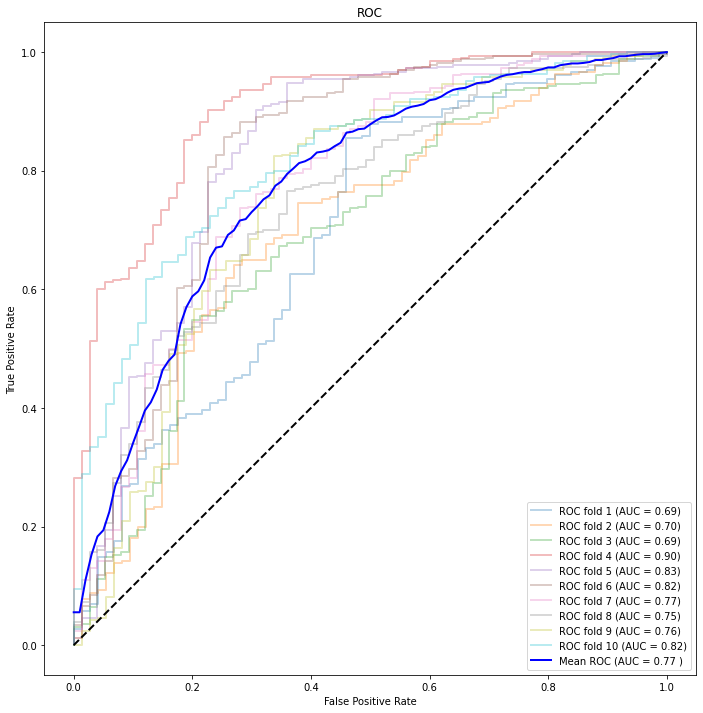

In [ ]:
tprs = []
aucs = []
precs =[]

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
i = 1
for train,test in cv.split(x,y):
    xtrn =[x[:][ii] for ii in train ]
    xtst =[x[:][ii] for ii in test ]
    ytrn = [y[ii] for ii in train]
    ytst = [y[ii] for ii in test]
    
    prediction = clf.fit(xtrn, ytrn).predict_proba(xtst)
    fpr, tpr, t = roc_curve(ytst, prediction[:, 1])
    
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC fold {i} (AUC = {roc_auc:.2f})')
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

thisResult["plots"]["roc"] = mean_tpr
thisResult["plots"]["auc-roc"] = np.mean(aucs, axis=0)*100


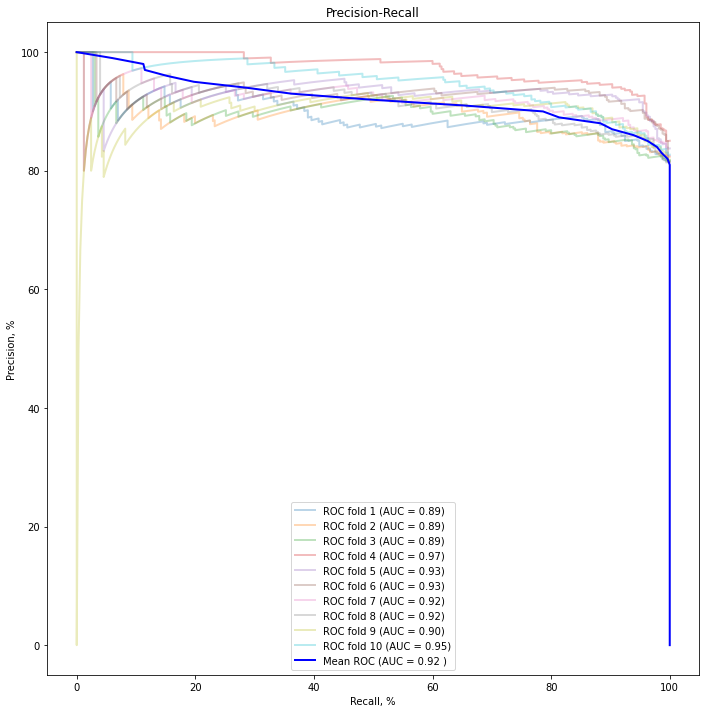

In [ ]:
recs = []
aucs = []
precs =[]

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
i = 1
for train,test in cv.split(x,y):
    xtrn =[x[:][ii] for ii in train ]
    xtst =[x[:][ii] for ii in test ]
    ytrn = [y[ii] for ii in train]
    ytst = [y[ii] for ii in test]

    prediction = clf.fit(xtrn, ytrn).predict_proba(xtst)
    prec, rec, t = precision_recall_curve(ytst, prediction[:, 1])
    recs.append(interp(mean_prec, prec, rec))
    
    roc_auc = auc(rec, prec)
    aucs.append(roc_auc)
    plt.plot(rec*100, prec*100, lw=2, alpha=0.3, label=f'ROC fold {i} (AUC = {roc_auc:.2f})')
    plt.legend()
    i= i+1


mean_rec = np.mean(recs, axis=0)
mean_auc = auc(mean_prec, mean_rec)
plt.plot(mean_rec*100, mean_prec*100, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.legend()

plt.xlabel('Recall, %')
plt.ylabel('Precision, %')
plt.title('Precision-Recall')
plt.show()


thisResult["plots"]["prec-recall"] = mean_rec
thisResult["plots"]["auc-prec-recall"] = np.mean(aucs, axis=0)*100

# ===============================================================

### ElasticNet (K-Fold)

In [ ]:
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=False)
clf = ElasticNet(alpha=0.01, l1_ratio=0.5)
clf = LogisticRegression(penalty='elasticnet', max_iter=50000, solver='saga', l1_ratio=0.5,multi_class='ovr')

results["ElasticNet"]={}
thisResult=results["ElasticNet"]
thisResult["scores"]={}
thisResult["plots"]={}

In [ ]:
results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, )
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["Accuracy"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='precision')
print("Precision: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["Precision"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='recall')
print("Recall: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["Recall"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='f1')
print("F1: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["F1"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='roc_auc')
print("ROC_AUC: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["ROC_AUC"]=results_kfold.mean()*100.0



Accuracy: 83.37%
Precision: 84.38%
Recall: 97.76%
F1: 90.56%
ROC_AUC: 76.22%


### Calculate ROC (K-Fold)

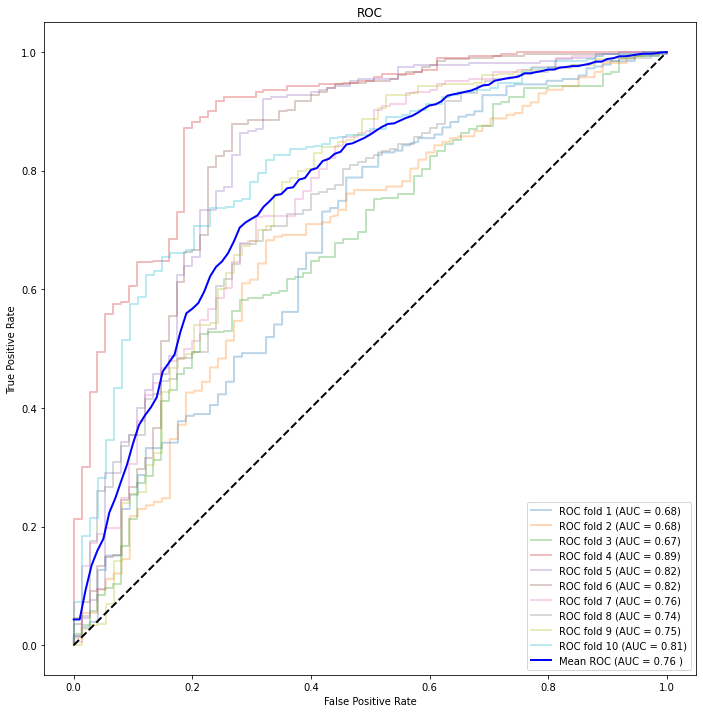

In [ ]:

# clf = LogisticRegression(max_iter=50000)
tprs = []
aucs = []
precs =[]

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
i = 1
for train,test in cv.split(x,y):
    xtrn =[x[:][ii] for ii in train ]
    xtst =[x[:][ii] for ii in test ]
    ytrn = [y[ii] for ii in train]
    ytst = [y[ii] for ii in test]
    
# [prec, rec, tresh]= precision_recall_curve(y_test, prob)
# name = "ElasticNet Regression"
# label =(f"{name} (AUC = "f"{enet_auc:0.3f})")
# plt.plot(rec*100, prec*100, label = label)
# plt.legend()
# rr.decision_function(x_test)
    prediction = clf.fit(xtrn, ytrn).predict_proba(xtst)
    fpr, tpr, t = roc_curve(ytst, prediction[:, 1])
    
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC fold {i} (AUC = {roc_auc:.2f})')
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

thisResult["plots"]["roc"] = mean_tpr
thisResult["plots"]["auc-roc"] = np.mean(aucs, axis=0)*100



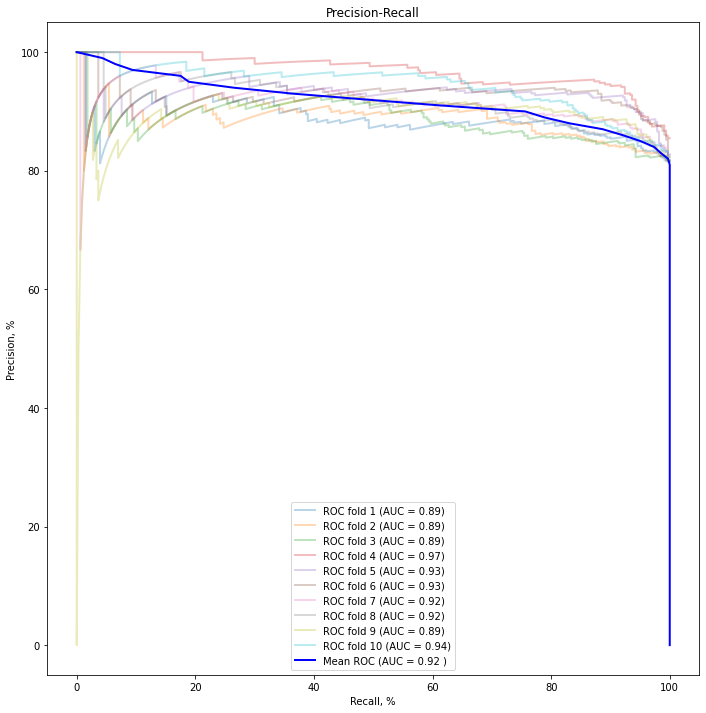

In [ ]:
recs = []
aucs = []
precs =[]

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
i = 1
for train,test in cv.split(x,y):
    xtrn =[x[:][ii] for ii in train ]
    xtst =[x[:][ii] for ii in test ]
    ytrn = [y[ii] for ii in train]
    ytst = [y[ii] for ii in test]

    prediction = clf.fit(xtrn, ytrn).predict_proba(xtst)
    prec, rec, t = precision_recall_curve(ytst, prediction[:, 1])
    recs.append(interp(mean_prec, prec, rec))
    
    roc_auc = auc(rec, prec)
    aucs.append(roc_auc)
    plt.plot(rec*100, prec*100, lw=2, alpha=0.3, label=f'ROC fold {i} (AUC = {roc_auc:.2f})')
    plt.legend()
    i= i+1


mean_rec = np.mean(recs, axis=0)
mean_auc = auc(mean_prec, mean_rec)
plt.plot(mean_rec*100, mean_prec*100, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.legend()

plt.xlabel('Recall, %')
plt.ylabel('Precision, %')
plt.title('Precision-Recall')
plt.show()

thisResult["plots"]["prec-recall"] = mean_rec
thisResult["plots"]["auc-prec-recall"] = np.mean(aucs, axis=0)*100

# ===============================================================

### LASSO (K-Fold)

In [ ]:
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=False)
clf = Lasso( alpha=0.00001, max_iter=10e5)
clf = LogisticRegression(max_iter=50000, solver='saga',multi_class='ovr', penalty='l1')

results["Lasso"]={}
thisResult=results["Lasso"]
thisResult["scores"]={}
thisResult["plots"]={}

In [ ]:
results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, )
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["Accuracy"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='precision')
print("Precision: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["Precision"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='recall')
print("Recall: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["Recall"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='f1')
print("F1: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["F1"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='roc_auc')
print("ROC_AUC: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["ROC_AUC"]=results_kfold.mean()*100.0


Accuracy: 83.32%
Precision: 84.64%
Recall: 97.27%
F1: 90.49%
ROC_AUC: 75.55%


### Calculate ROC (K-Fold)

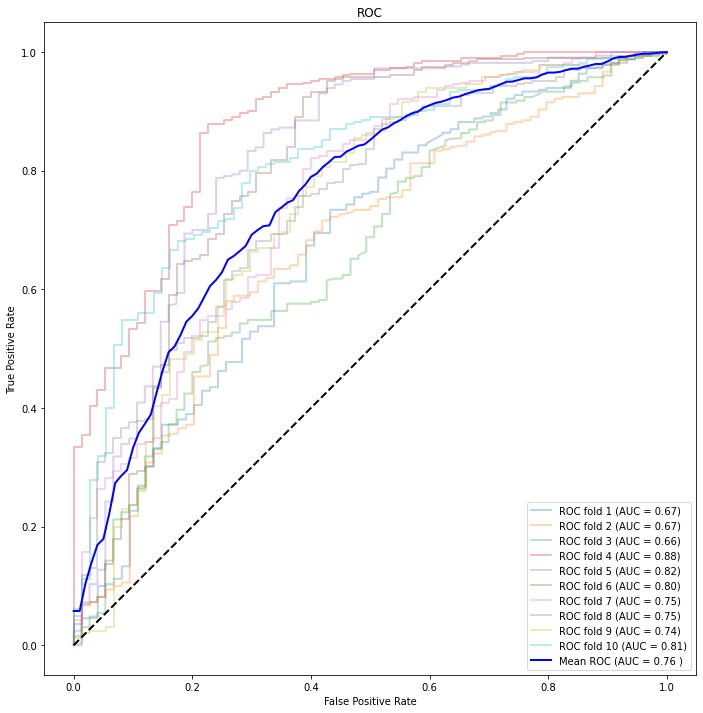

In [ ]:

# clf = LogisticRegression(max_iter=50000)
tprs = []
aucs = []
precs =[]

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
i = 1
for train,test in cv.split(x,y):
    xtrn =[x[:][ii] for ii in train ]
    xtst =[x[:][ii] for ii in test ]
    ytrn = [y[ii] for ii in train]
    ytst = [y[ii] for ii in test]
    
    prediction = clf.fit(xtrn, ytrn).predict_proba(xtst)
    fpr, tpr, t = roc_curve(ytst, prediction[:, 1])
    
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC fold {i} (AUC = {roc_auc:.2f})')
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

thisResult["plots"]["roc"] = mean_tpr
thisResult["plots"]["auc-roc"] = np.mean(aucs, axis=0)*100



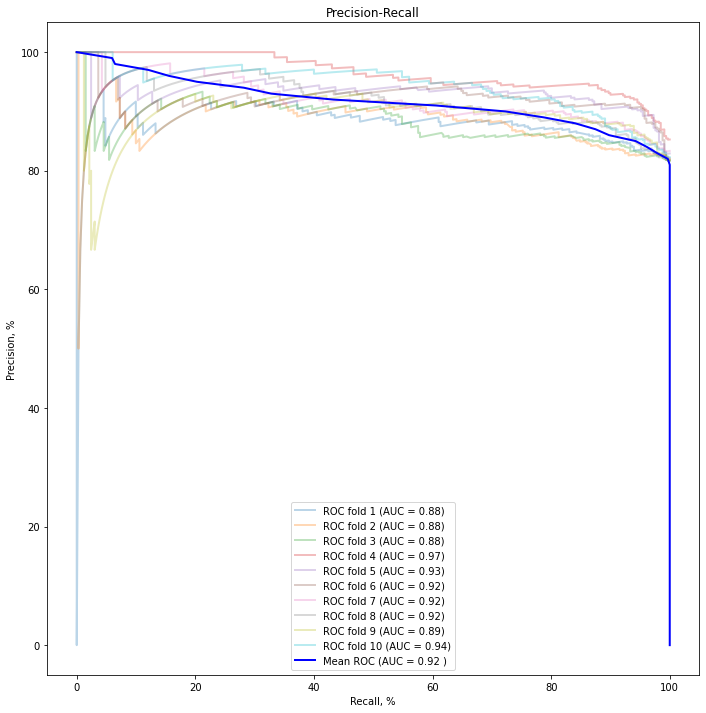

In [ ]:
recs = []
aucs = []
precs =[]


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
i = 1
for train,test in cv.split(x,y):
    xtrn =[x[:][ii] for ii in train ]
    xtst =[x[:][ii] for ii in test ]
    ytrn = [y[ii] for ii in train]
    ytst = [y[ii] for ii in test]

    prediction = clf.fit(xtrn, ytrn).predict_proba(xtst)
    prec, rec, t = precision_recall_curve(ytst, prediction[:, 1])
    recs.append(interp(mean_prec, prec, rec))
    
    roc_auc = auc(rec, prec)
    aucs.append(roc_auc)
    plt.plot(rec*100, prec*100, lw=2, alpha=0.3, label=f'ROC fold {i} (AUC = {roc_auc:.2f})')
    plt.legend()
    i= i+1


mean_rec = np.mean(recs, axis=0)
mean_auc = auc(mean_prec, mean_rec)
plt.plot(mean_rec*100, mean_prec*100, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.legend()

plt.xlabel('Recall, %')
plt.ylabel('Precision, %')
plt.title('Precision-Recall')
plt.show()

thisResult["plots"]["prec-recall"] = mean_rec
thisResult["plots"]["auc-prec-recall"] = np.mean(aucs, axis=0)*100

# ===============================================================

### Randon Forest Classifier (K-Fold)

In [ ]:
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=False)
clf = RandomForestClassifier()
x = X_tree
results["Random Forest"]={}
thisResult=results["Random Forest"]
thisResult["scores"]={}
thisResult["plots"]={}

In [ ]:
results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, )
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["Accuracy"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='precision')
print("Precision: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["Precision"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='recall')
print("Recall: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["Recall"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='f1')
print("F1: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["F1"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='roc_auc')
print("ROC_AUC: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["ROC_AUC"]=results_kfold.mean()*100.0



Accuracy: 81.74%
Precision: 82.17%
Recall: 99.30%
F1: 89.99%
ROC_AUC: 75.26%


### Calculate ROC (K-Fold)

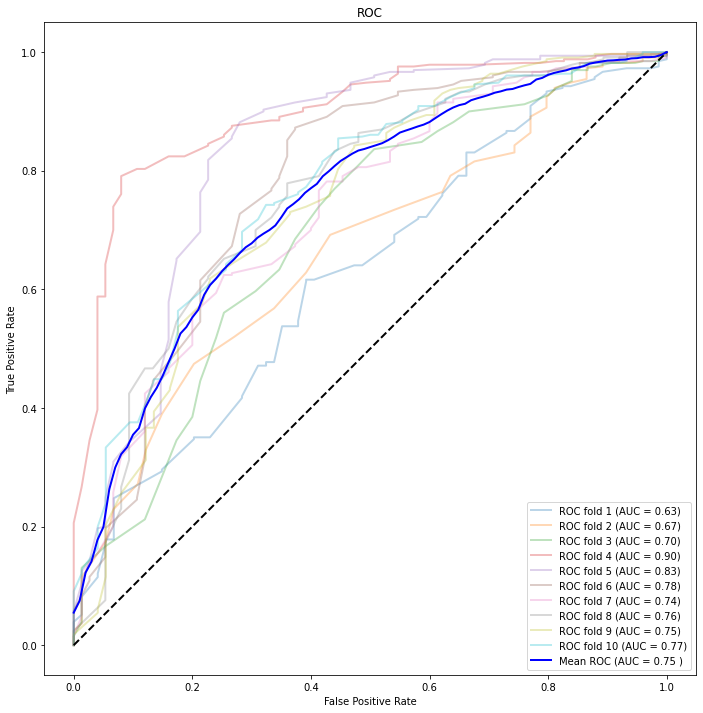

In [ ]:
tprs = []
aucs = []
precs =[]

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
i = 1
for train,test in cv.split(x,y):
    xtrn =[x[:][ii] for ii in train ]
    xtst =[x[:][ii] for ii in test ]
    ytrn = [y[ii] for ii in train]
    ytst = [y[ii] for ii in test]
    
# [prec, rec, tresh]= precision_recall_curve(y_test, prob)
# name = "ElasticNet Regression"
# label =(f"{name} (AUC = "f"{enet_auc:0.3f})")
# plt.plot(rec*100, prec*100, label = label)
# plt.legend()
# rr.decision_function(x_test)
    prediction = clf.fit(xtrn, ytrn).predict_proba(xtst)
    fpr, tpr, t = roc_curve(ytst, prediction[:, 1])
    
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC fold {i} (AUC = {roc_auc:.2f})')
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()


thisResult["plots"]["roc"] = mean_tpr
thisResult["plots"]["auc-roc"] = np.mean(aucs, axis=0)*100


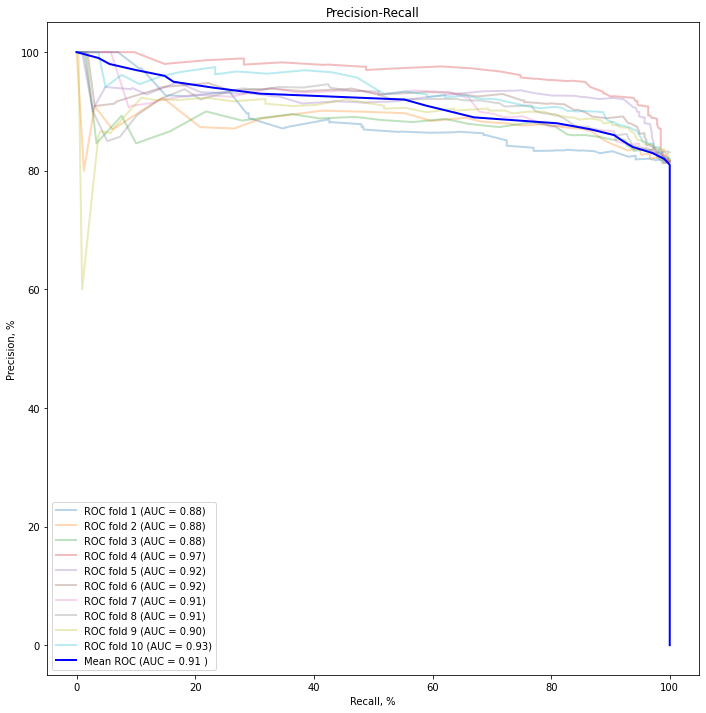

In [ ]:
recs = []
aucs = []
precs =[]

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
i = 1
for train,test in cv.split(x,y):
    xtrn =[x[:][ii] for ii in train ]
    xtst =[x[:][ii] for ii in test ]
    ytrn = [y[ii] for ii in train]
    ytst = [y[ii] for ii in test]

    prediction = clf.fit(xtrn, ytrn).predict_proba(xtst)
    prec, rec, t = precision_recall_curve(ytst, prediction[:, 1])
    recs.append(interp(mean_prec, prec, rec))
    
    roc_auc = auc(rec, prec)
    aucs.append(roc_auc)
    plt.plot(rec*100, prec*100, lw=2, alpha=0.3, label=f'ROC fold {i} (AUC = {roc_auc:.2f})')
    plt.legend()
    i= i+1


mean_rec = np.mean(recs, axis=0)
mean_auc = auc(mean_prec, mean_rec)
plt.plot(mean_rec*100, mean_prec*100, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.legend()

plt.xlabel('Recall, %')
plt.ylabel('Precision, %')
plt.title('Precision-Recall')
plt.show()

thisResult["plots"]["prec-recall"] = mean_rec
thisResult["plots"]["auc-prec-recall"] = np.mean(aucs, axis=0)*100

# ===============================================================

### RidgeClassifier (K-Fold)

In [ ]:
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=False)
clf = RidgeClassifier(alpha=0.0001) 
x=X_reg
results["Ridge Classifier"]={}
thisResult=results["Ridge Classifier"]
thisResult["scores"]={}
thisResult["plots"]={}

In [ ]:
results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, )
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["Accuracy"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='precision')
print("Precision: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["Precision"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='recall')
print("Recall: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["Recall"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='f1')
print("F1: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["F1"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='roc_auc')
print("ROC_AUC: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["ROC_AUC"]=results_kfold.mean()*100.0


Accuracy: 73.69%
Precision: 85.95%
Recall: 81.10%
F1: 83.39%
ROC_AUC: 67.12%


### Calculate ROC (K-Fold)

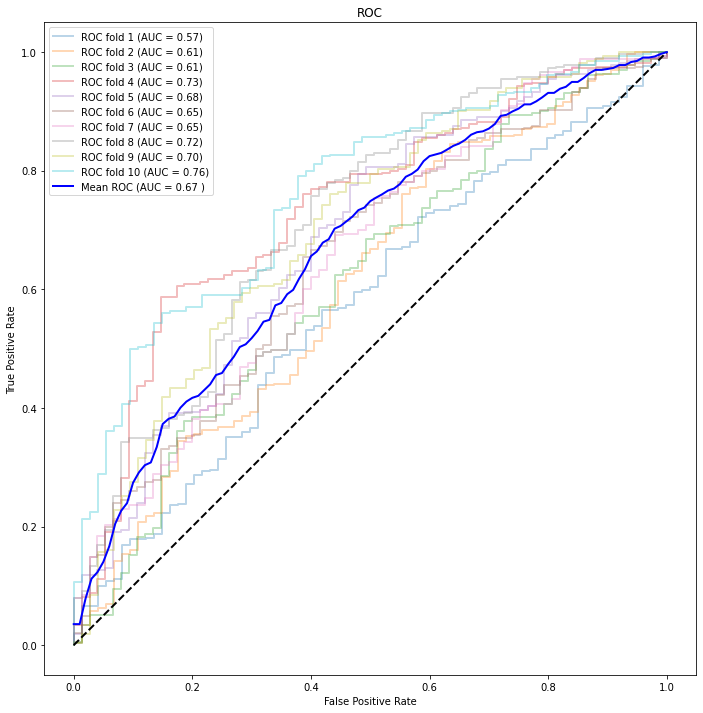

In [ ]:

# clf = LogisticRegression(max_iter=50000)
tprs = []
aucs = []
precs =[]

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
i = 1
for train,test in cv.split(x,y):
    xtrn =[x[:][ii] for ii in train ]
    xtst =[x[:][ii] for ii in test ]
    ytrn = [y[ii] for ii in train]
    ytst = [y[ii] for ii in test]
    
# [prec, rec, tresh]= precision_recall_curve(y_test, prob)
# name = "ElasticNet Regression"
# label =(f"{name} (AUC = "f"{enet_auc:0.3f})")
# plt.plot(rec*100, prec*100, label = label)
# plt.legend()
# rr.decision_function(x_test)
#     prediction = clf.fit(xtrn, ytrn).predict_proba(xtst)
    prediction = clf.fit(xtrn, ytrn).decision_function(xtst)
    fpr, tpr, t = roc_curve(ytst, prediction)
    
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC fold {i} (AUC = {roc_auc:.2f})')
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

thisResult["plots"]["roc"] = mean_tpr
thisResult["plots"]["auc-roc"] = np.mean(aucs, axis=0)*100



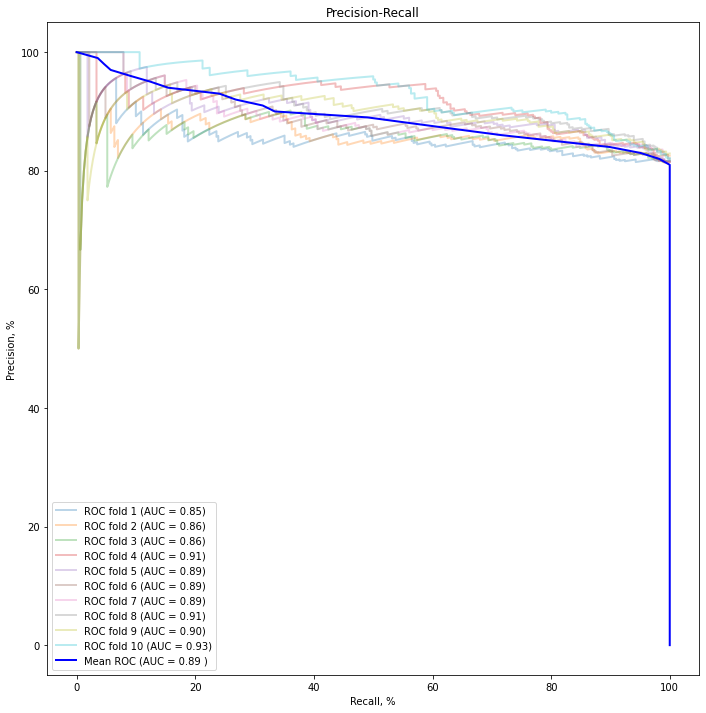

In [ ]:
recs = []
aucs = []
precs =[]

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
i = 1
for train,test in cv.split(x,y):
    xtrn =[x[:][ii] for ii in train ]
    xtst =[x[:][ii] for ii in test ]
    ytrn = [y[ii] for ii in train]
    ytst = [y[ii] for ii in test]

    prediction = clf.fit(xtrn, ytrn).decision_function(xtst)
    prec, rec, t = precision_recall_curve(ytst, prediction)
    recs.append(interp(mean_prec, prec, rec))
    
    roc_auc = auc(rec, prec)
    aucs.append(roc_auc)
    plt.plot(rec*100, prec*100, lw=2, alpha=0.3, label=f'ROC fold {i} (AUC = {roc_auc:.2f})')
    plt.legend()
    i= i+1


mean_rec = np.mean(recs, axis=0)
mean_auc = auc(mean_prec, mean_rec)
plt.plot(mean_rec*100, mean_prec*100, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.legend()

plt.xlabel('Recall, %')
plt.ylabel('Precision, %')
plt.title('Precision-Recall')
plt.show()

thisResult["plots"]["prec-recall"] = mean_rec
thisResult["plots"]["auc-prec-recall"] = np.mean(aucs, axis=0)*100

# ===============================================================

### XG Boost (K-Fold)

In [ ]:
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=False)
clf = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

results["XG Boost"]={}
thisResult=results["XG Boost"]
thisResult["scores"]={}
thisResult["plots"]={}

In [ ]:
# XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
#              min_child_weight=1, missing=nan, monotone_constraints='()',
#              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
#              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, )
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["Accuracy"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='precision')
print("Precision: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["Precision"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='recall')
print("Recall: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["Recall"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='f1')
print("F1: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["F1"]=results_kfold.mean()*100.0

results_kfold = model_selection.cross_val_score(clf, x, y, cv=cv, scoring='roc_auc')
print("ROC_AUC: %.2f%%" % (results_kfold.mean()*100.0)) 
thisResult["scores"]["ROC_AUC"]=results_kfold.mean()*100.0


Accuracy: 82.93%
Precision: 85.02%
Recall: 96.09%
F1: 90.18%
ROC_AUC: 75.17%


### Calculate ROC (K-Fold)

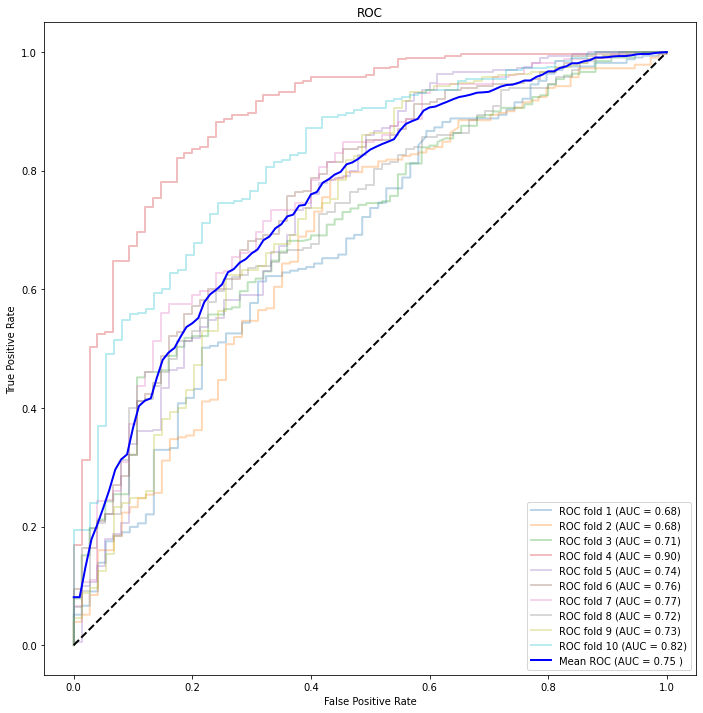

In [ ]:

# clf = LogisticRegression(max_iter=50000)
tprs = []
aucs = []
precs =[]

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
i = 1
for train,test in cv.split(x,y):
    xtrn =[x[:][ii] for ii in train ]
    xtst =[x[:][ii] for ii in test ]
    ytrn = [y[ii] for ii in train]
    ytst = [y[ii] for ii in test]
    
    prediction = clf.fit(xtrn, ytrn).predict_proba(xtst)
    fpr, tpr, t = roc_curve(ytst, prediction[:,1])
    
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC fold {i} (AUC = {roc_auc:.2f})')
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

thisResult["plots"]["roc"] = mean_tpr
thisResult["plots"]["auc-roc"] = np.mean(aucs, axis=0)*100



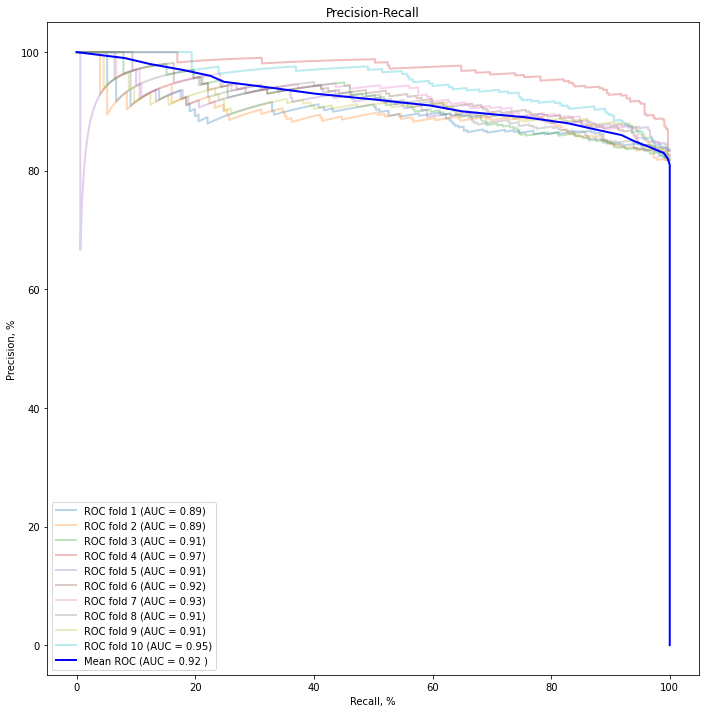

In [ ]:
recs = []
aucs = []
precs =[]

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
i = 1
for train,test in cv.split(x,y):
    xtrn =[x[:][ii] for ii in train ]
    xtst =[x[:][ii] for ii in test ]
    ytrn = [y[ii] for ii in train]
    ytst = [y[ii] for ii in test]

    prediction = clf.fit(xtrn, ytrn).predict_proba(xtst)
    prec, rec, t = precision_recall_curve(ytst, prediction[:,1])
    recs.append(interp(mean_prec, prec, rec))
    
    roc_auc = auc(rec, prec)
    aucs.append(roc_auc)
    plt.plot(rec*100, prec*100, lw=2, alpha=0.3, label=f'ROC fold {i} (AUC = {roc_auc:.2f})')
    plt.legend()
    i= i+1


mean_rec = np.mean(recs, axis=0)
mean_auc = auc(mean_prec, mean_rec)
plt.plot(mean_rec*100, mean_prec*100, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.legend()

plt.xlabel('Recall, %')
plt.ylabel('Precision, %')
plt.title('Precision-Recall')
plt.show()

thisResult["plots"]["prec-recall"] = mean_rec
thisResult["plots"]["auc-prec-recall"] = np.mean(aucs, axis=0)*100

# ================= Final Results =========================

Text(0, 0.5, 'True Positive Rate')

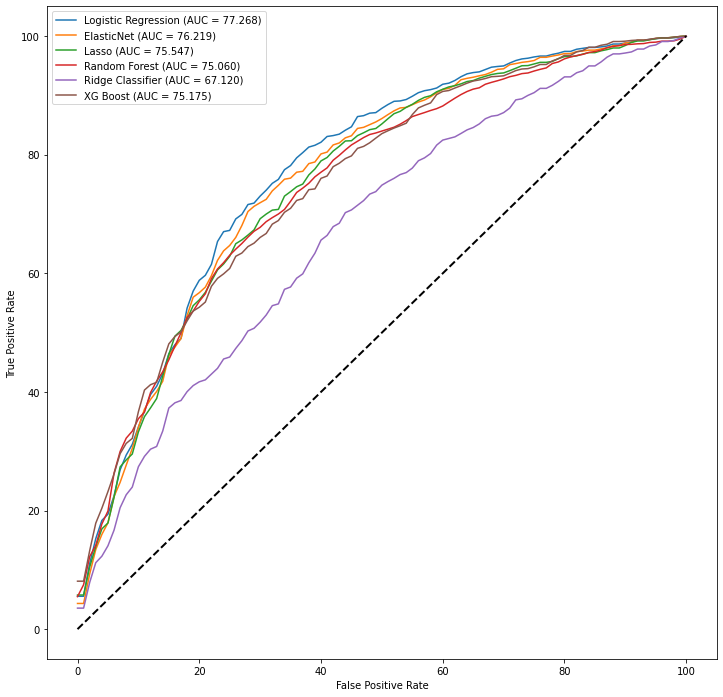

In [ ]:
plt.figure(figsize=(12, 12))

for name in results:
    label =(f"{name} (AUC = "f"{results[name]['plots']['auc-roc']:0.3f})")
    plt.plot(mean_fpr*100,results[name]['plots']['roc']*100, label = label)
    plt.legend()
plt.plot([0,100],[0,100],linestyle = '--',lw = 2,color = 'black')

plt.xlabel('Specifity, %')
plt.ylabel('Sensitivity, %')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ===============================================================

Text(0, 0.5, 'Precision, %')

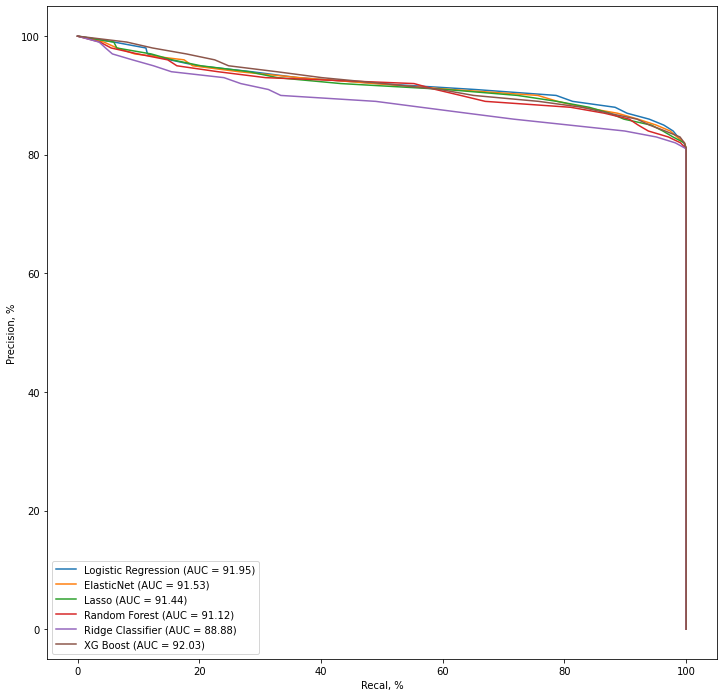

In [ ]:
plt.figure(figsize=(12, 12))

for name in results:
    label =(f"{name} (AUC = "f"{results[name]['plots']['auc-prec-recall']:0.2f})")
    plt.plot(results[name]['plots']['prec-recall']*100,mean_prec*100, label = label)
    plt.legend()
    
plt.xlabel('Recal, %')
plt.ylabel('Precision, %')    

In [ ]:
for name in results:
    print(name)
    print(results[name]['scores'])
    print()
    

Logistic Regression
{'Accuracy': 83.3252047426965, 'Precision': 84.40004652676872, 'Recall': 97.66730751625012, 'F1': 90.52649785479232, 'ROC_AUC': 77.26776216480144}

ElasticNet
{'Accuracy': 83.37434298985455, 'Precision': 84.38345601400815, 'Recall': 97.75821660715923, 'F1': 90.55925784408701, 'ROC_AUC': 76.21892452738375}

Lasso
{'Accuracy': 83.32496027380516, 'Precision': 84.63903352047048, 'Recall': 97.27318502242973, 'F1': 90.48831816925464, 'ROC_AUC': 75.5473978785157}

Random Forest
{'Accuracy': 81.74428553966509, 'Precision': 82.17333442986036, 'Recall': 99.30330495285178, 'F1': 89.98764924852279, 'ROC_AUC': 75.2570024652502}

Ridge Classifier
{'Accuracy': 73.69154137635987, 'Precision': 85.95304895306468, 'Recall': 81.10006408495835, 'F1': 83.39354031930955, 'ROC_AUC': 67.12013971675603}

XG Boost
{'Accuracy': 82.93014301430142, 'Precision': 85.01983896206028, 'Recall': 96.09228234001648, 'F1': 90.17610444915871, 'ROC_AUC': 75.17479227648411}



# ===============================================================

# ===============================================================